Students: 
- Davide Cremonini - 14412
- Davide Sbetti - 14032

# Fake Job Postings Detector

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/DavideCremonini/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Reading the dataset

Reading the input dataset and visualizing the first 5 rows

In [2]:
fake_real_postings = pd.read_csv("data/fake_job_postings.csv")
fake_real_postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Checking how many null values we have in each feature

In [3]:
real_postings = fake_real_postings[fake_real_postings["fraudulent"] == 0]
real_null = real_postings.isnull().sum(axis = 0) / real_postings.shape[0]

fake_postings = fake_real_postings[fake_real_postings["fraudulent"] == 1]
fake_null = fake_postings.isnull().sum(axis = 0) / fake_postings.shape[0]

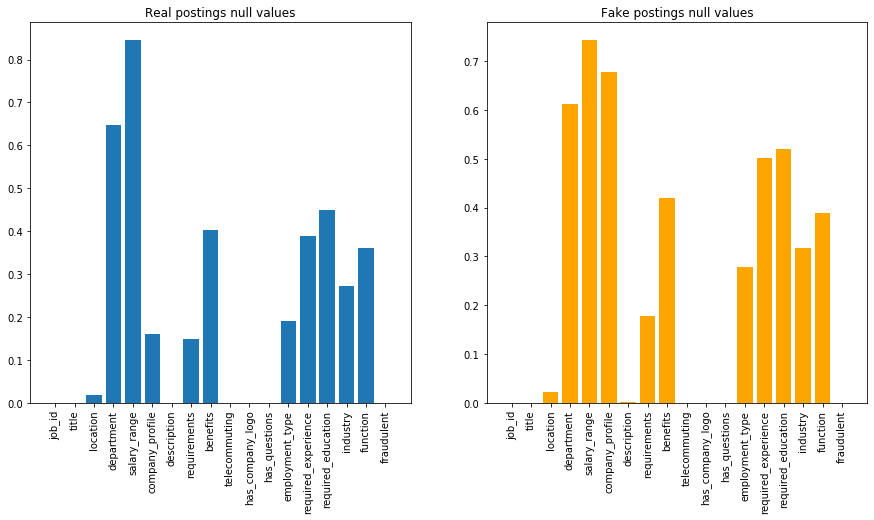

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))

ax1.bar(real_null.index,real_null.values)

ax1.set_xticklabels(real_null.index,rotation = 90)

ax1.title.set_text("Real postings null values")

ax2.bar(fake_null.index,fake_null.values, color = "orange")

ax2.set_xticklabels(fake_null.index,rotation = 90)

ax2.title.set_text("Fake postings null values")

plt.show()

In [5]:
fake_real_postings.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

## Data pre-processing

### Splitting columns

In [6]:
fake_real_postings['country'] = fake_real_postings.location.str.split(",").str[0]
fake_real_postings['city'] = fake_real_postings.location.str.split(",").str[-1]

In [7]:
fake_real_postings['salary_range'].fillna("0-0", inplace = True)




fake_real_postings['salary_low'] = fake_real_postings.salary_range.str.split("-").str[0]
fake_real_postings['salary_up'] = fake_real_postings.salary_range.str.split("-").str[1]
fake_real_postings['salary_low'].fillna("0", inplace = True)
fake_real_postings['salary_up'].fillna("0", inplace = True)


fake_real_postings['salary_low'] = pd.to_numeric(fake_real_postings.salary_low, errors='coerce').fillna(0).astype(int)
fake_real_postings['salary_up'] = pd.to_numeric(fake_real_postings.salary_up, errors='coerce').fillna(0).astype(int)




### Removing columns

In [8]:
pd.set_option('display.max_rows', 20)

In [9]:
fake_real_postings = fake_real_postings.drop(columns=['job_id','location', 'salary_range'])

### Dealing with nulls

In [10]:
col_names = fake_real_postings.columns.values

for col in col_names:
    replacement = "No " + col
    if col == "city" or col == "country":
        replacement = "No location"
    if col != "salary_range":
        
        fake_real_postings[col].fillna(replacement,inplace = True)
        fake_real_postings[col].replace(" ", replacement, inplace = True)
        fake_real_postings[col].replace("", replacement,inplace = True)

In [11]:
fake_real_postings

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city,salary_low,salary_up
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No benefits,0,1,0,Other,Internship,No required_education,No industry,Marketing,0,US,New York,0,0
1,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,No required_education,Marketing and Advertising,Customer Service,0,NZ,Auckland,0,0
2,Commissioning Machinery Assistant (CMA),No department,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No benefits,0,1,0,No employment_type,No required_experience,No required_education,No industry,No function,0,US,Wever,0,0
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington,0,0
4,Bill Review Manager,No department,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Fort Worth,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,No required_education,Computer Software,Sales,0,CA,Toronto,0,0
17876,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,Philadelphia,0,0
17877,Project Cost Control Staff Engineer - Cost Con...,No department,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,No benefits,0,0,0,Full-time,No required_experience,No required_education,No industry,No function,0,US,Houston,0,0
17878,Graphic Designer,No department,No company_profile,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,Lagos,0,0


### Unifying text columns

In [12]:
fake_real_postings['text'] = fake_real_postings[['title', 'department','company_profile', 'description', 
                                                 'requirements', 'benefits','city']].agg(' '.join, axis=1)

In [13]:
fake_real_postings = fake_real_postings.drop(columns=['title', 'department','company_profile',
                                                      'description', "requirements", "benefits","city"])

In [14]:
fake_real_postings

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,salary_low,salary_up,text
0,0,1,0,Other,Internship,No required_education,No industry,Marketing,0,US,0,0,"Marketing Intern Marketing We're Food52, and w..."
1,0,1,0,Full-time,Not Applicable,No required_education,Marketing and Advertising,Customer Service,0,NZ,0,0,Customer Service - Cloud Video Production Succ...
2,0,1,0,No employment_type,No required_experience,No required_education,No industry,No function,0,US,0,0,Commissioning Machinery Assistant (CMA) No dep...
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,0,0,Account Executive - Washington DC Sales Our pa...
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,0,0,Bill Review Manager No department SpotSource S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,No required_education,Computer Software,Sales,0,CA,0,0,Account Director - Distribution Sales Vend is...
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,0,0,Payroll Accountant Accounting WebLinc is the e...
17877,0,0,0,Full-time,No required_experience,No required_education,No industry,No function,0,US,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,0,0,Graphic Designer No department No company_prof...


### One hot encoding

In [15]:
fake_real_encoded = pd.get_dummies(fake_real_postings, columns = ['employment_type', 'required_experience', 'required_education'])


In [16]:
fake_real_encoded.shape

(17880, 38)

### Hash Index

In [17]:
fake_real_postings.nunique()

telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
country                   91
salary_low               241
salary_up                272
text                   17454
dtype: int64

In [18]:
#Label encoding
import category_encoders as ce


cat_cols = ['country', 'industry', 'function']
encoder = ce.OrdinalEncoder(cols=cat_cols)
fake_real_encoded = encoder.fit_transform(fake_real_encoded)

In [19]:
hash_enc = ce.BinaryEncoder(cols=['country', 'industry', 'function'])
fake_real_encoded = hash_enc.fit_transform(fake_real_encoded)


In [20]:
fake_real_encoded.loc[:,'function_0':'function_6']

,function_0,function_1,function_2,function_3,function_4,function_5,function_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
17875,0,0,0,0,1,0,0
17876,0,0,1,1,1,0,0
17877,0,0,0,0,0,1,1
17878,0,0,0,1,0,1,1


In [21]:
fake_real_encoded

,telecommuting,has_company_logo,has_questions,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,...,required_education_High School or equivalent,required_education_Master's Degree,required_education_No required_education,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17876,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17878,0,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


## hash vectorizer experiments

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer
#from imblearn.over_sampling import SMOTE

In [23]:
vectorizer = HashingVectorizer(n_features=2**10, stop_words="english")
textHashed = vectorizer.fit_transform(fake_real_encoded["text"])

In [24]:
textHashDf = pd.DataFrame.sparse.from_spmatrix(textHashed)

In [25]:
textHashDf

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000000,0.0,0.048224,0.048224,-0.048224,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.048224,-0.048224,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.117557,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-0.019593,0.000000,-0.058778,...,0.000000,0.000000,0.000000,-0.019593,0.0,0.019593,0.000000,0.000000,0.000000,0.019593
2,-0.045932,0.0,0.045932,-0.045932,-0.045932,0.0,0.000000,0.000000,0.000000,-0.045932,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.030179,0.0,0.060357,-0.060357,0.000000,0.0,-0.030179,0.000000,-0.030179,0.000000,...,0.000000,-0.030179,0.030179,0.000000,0.0,0.000000,0.000000,-0.120714,0.000000,0.000000
4,0.000000,0.0,0.040226,0.000000,0.040226,0.0,0.000000,0.000000,0.201129,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.000000,0.0,0.000000,-0.057073,-0.054473,0.0,0.000000,0.000000,0.000000,-0.107211,...,0.000000,0.000000,0.000000,-0.116248,0.0,0.000000,0.000000,-0.029361,0.000000,0.000000
17876,0.000000,0.0,0.101015,-0.093659,0.000000,0.0,0.000000,0.000000,-0.039746,-0.105802,...,0.000000,0.000000,-0.070888,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.101015
17877,-0.506834,0.0,0.226455,0.000000,-0.152057,0.0,-0.033113,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,0.000000,0.000000,0.000000
17878,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.104765,...,-0.032951,0.000000,0.000000,0.000000,0.0,-0.071982,0.000000,0.000000,-0.053452,0.000000


In [26]:
trainData = pd.concat([fake_real_encoded,textHashDf],axis = 1)

In [27]:
trainData

,telecommuting,has_company_logo,has_questions,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,-0.048224,-0.048224,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,-0.019593,0.0,0.019593,0.000000,0.000000,0.000000,0.019593
2,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,1,0,0,0,0,0,0,0,0,...,0.000000,-0.030179,0.030179,0.000000,0.0,0.000000,0.000000,-0.120714,0.000000,0.000000
4,0,1,1,0,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,-0.116248,0.0,0.000000,0.000000,-0.029361,0.000000,0.000000
17876,0,1,1,0,0,0,0,0,1,0,...,0.000000,0.000000,-0.070888,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.101015
17877,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,0.000000,0.000000,0.000000
17878,0,0,1,0,0,1,0,1,0,1,...,-0.032951,0.000000,0.000000,0.000000,0.0,-0.071982,0.000000,0.000000,-0.053452,0.000000


In [28]:
y = trainData["fraudulent"]
trainData = trainData.drop(columns=["fraudulent", "text"])

## Classifier

In [29]:
numericalDataset = fake_real_encoded.drop(columns = ["text"])

In [30]:
trainData

,telecommuting,has_company_logo,has_questions,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,-0.048224,-0.048224,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,-0.019593,0.0,0.019593,0.000000,0.000000,0.000000,0.019593
2,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,1,0,0,0,0,0,0,0,0,...,0.000000,-0.030179,0.030179,0.000000,0.0,0.000000,0.000000,-0.120714,0.000000,0.000000
4,0,1,1,0,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,-0.116248,0.0,0.000000,0.000000,-0.029361,0.000000,0.000000
17876,0,1,1,0,0,0,0,0,1,0,...,0.000000,0.000000,-0.070888,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.101015
17877,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,0.000000,0.000000,0.000000
17878,0,0,1,0,0,1,0,1,0,1,...,-0.032951,0.000000,0.000000,0.000000,0.0,-0.071982,0.000000,0.000000,-0.053452,0.000000


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainData, y, test_size = 0.3)

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = "minority")
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(sum(y_sm))
print(len(y_sm))

Using TensorFlow backend.


11920
23840


In [33]:
from sklearn.neural_network import MLPClassifier
speriamo = MLPClassifier(alpha = 0.001, max_iter = 300, hidden_layer_sizes=(100,), learning_rate_init=0.05)

speriamo.fit(X_sm, y_sm)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.05, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
y_pred = speriamo.predict(X_test)

print(np.mean(y_pred == y_test))
sum(y_pred)

0.8456375838926175


944

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
#print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print("\tActual values")
print("\t1\t0")
print("1|\t",tp,"\t",fp)
print("0|\t",fn,"\t",tn)
print("\n1 = fraudulent, 0 = true job posting")

	Actual values
	1	0
1|	 193 	 751
0|	 77 	 4343

1 = fraudulent, 0 = true job posting


## Keras

In [37]:
#import keras
#from keras.models import Sequential
#from keras.layers import Dense

In [38]:
#model = Sequential()
#model.add(Dense(100, input_dim=1081, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))



In [39]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
#history = model.fit(X_sm, y_sm, epochs=50, batch_size=64)

In [41]:
y_test

3739     0
15007    0
2260     0
4993     0
13239    0
        ..
14212    0
1881     0
3079     0
3103     0
1616     0
Name: fraudulent, Length: 5364, dtype: int64

In [42]:
y_predicted = model.predict_classes(X_test)

y_predicted = y_predicted.flatten("f")

NameError: name 'model' is not defined

In [ ]:
print(np.mean(y_predicted == y_test))
sum(y_predicted)

In [ ]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_predicted)
#print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print("\tActual values")
print("\t1\t0")
print("1|\t",tp,"\t",fp)
print("0|\t",fn,"\t",tn)
print("\n1 = fraudulent, 0 = true job posting")

***
## Prova niural

In [ ]:
import importlib

In [48]:
y_sm =pd.DataFrame(y_sm)
X_sm =pd.DataFrame(X_sm)

In [52]:
X_sm

,telecommuting,has_company_logo,has_questions,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,1,0,0,0,0,0,0,0,...,0.0,0.046778,0.070888,0.000000,0.000000,0.0,0.000000,0.059815,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.028398,0.000000,0.000000,0.000000
2,0,1,0,0,0,0,1,0,1,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0,1,1,0,0,0,1,0,0,1,...,0.0,0.000000,0.000000,-0.089205,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,0,0,0,0,0,0,0,0,0,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.001356,0.000000
23836,1,1,0,0,0,0,1,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
23837,0,0,0,0,0,0,1,0,0,0,...,0.0,0.000000,-0.096857,0.000000,0.040683,0.0,0.000000,0.000000,0.000000,0.000000
23838,0,1,0,0,0,0,0,0,0,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [49]:
from niural import Niural

niural = Niural(n_epochs=20, hidden_layer=[100])

niural.fit(X_sm, y_sm)



Index 0


TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable exp method

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
X = pd.DataFrame(X[y != 2])
y = pd.DataFrame(y[y != 2])

In [ ]:
y

In [ ]:
importlib.reload(Niural)

In [ ]:
niural = Niural(20, 0.01, 200, [10])

niural.prova()
niural.fit(X,y)